In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from ifanalysis import normalisation, figures
import pathlib


data_path = pathlib.Path('./data/Test_Data.csv')
conditions = ['siCtr', 'siCdc27']
control = 'siCtr'

def default_if_analysis():

    output_path = data_path.parent / 'sample_figures'
    output_path.mkdir(exist_ok=True)
    df = pd.read_csv(data_path, index_col=0)
    df_counts = normalisation.count_per_cond(df, control)
    df_counts.to_csv(output_path / 'counts.csv')
    df_cellcycle = normalisation.cellcycle_analysis(df, H3=True)
    figures.rel_cellnumber(df_counts, conditions, 'U2OS', path=output_path)
    figures.cellcycleplot_comb(df_cellcycle, conditions, 'U2OS', H3=True, bins=200, path=output_path)
    df_prop = normalisation.cellcycle_prop(df_cellcycle)
    df_prop.to_csv(output_path / 'cellcycle_prop.csv')
    figures.cellcycle_barplot(df_prop, conditions, H3=True, path=output_path)



Saving figure Relative Cell Number U2OS
Saving figure Combined Cell Cycle Plot U2OS
Saving figure Cell Cycle Summary Barplot


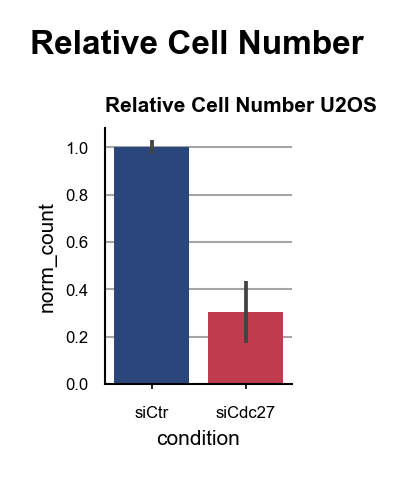

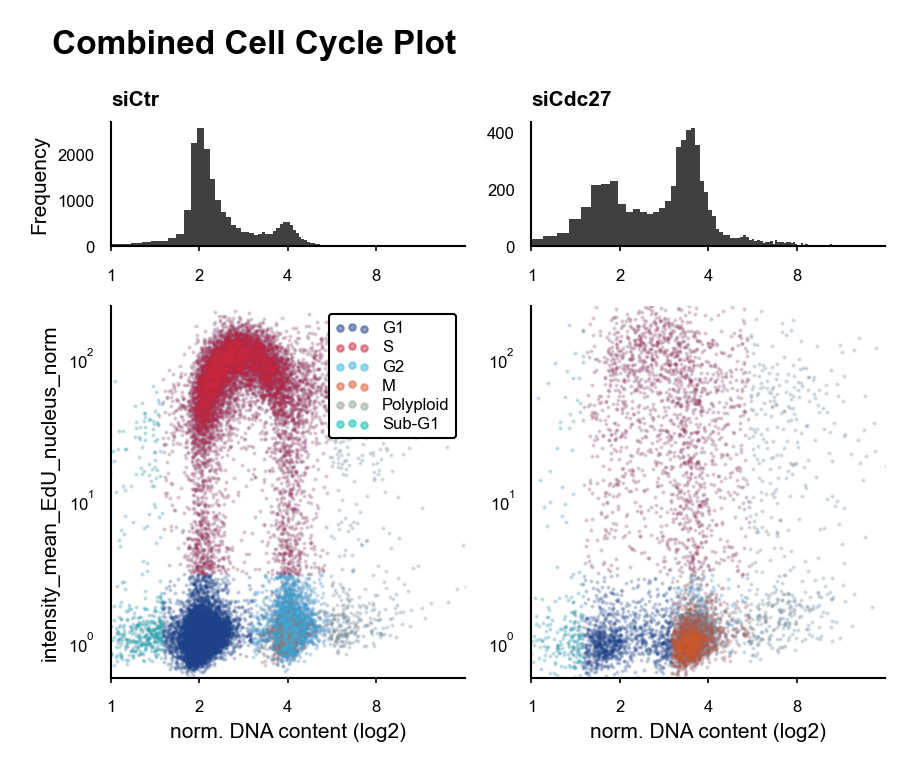

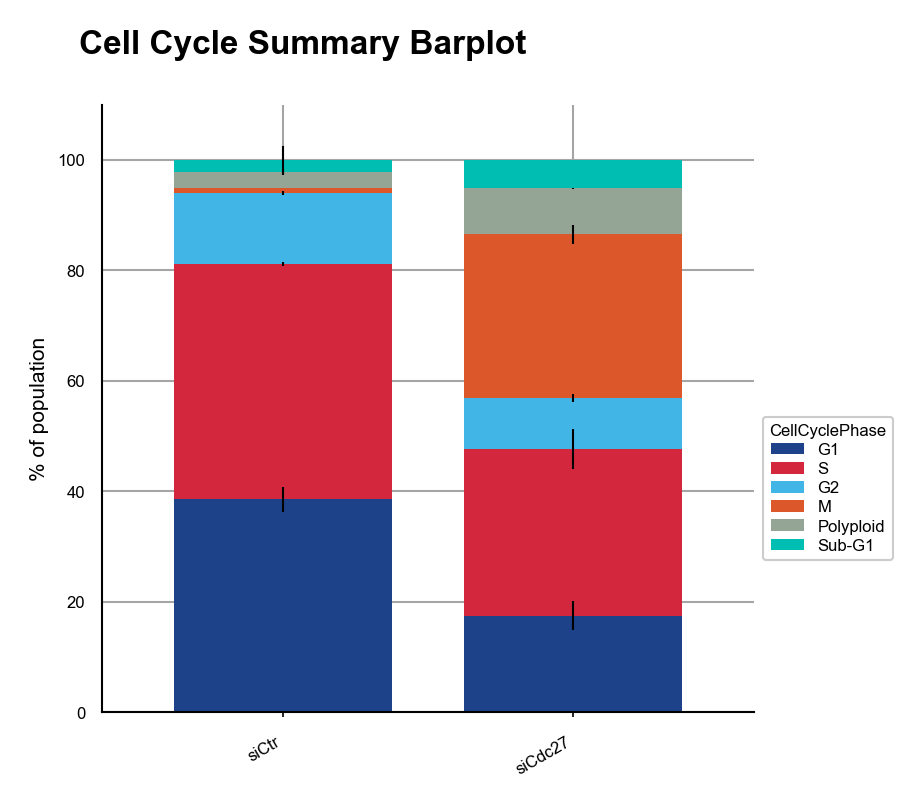

In [2]:
default_if_analysis()

In [ ]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304040 entries, 0 to 197
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   experiment                   304040 non-null  object 
 1   plate_id                     304040 non-null  int64  
 2   well                         304040 non-null  object 
 3   well_id                      304040 non-null  int64  
 4   image_id                     304040 non-null  int64  
 5   cell_line                    304040 non-null  object 
 6   condition                    304040 non-null  object 
 7   label                        304040 non-null  float64
 8   area_nucleus                 304040 non-null  float64
 9   intensity_max_DAPI_nucleus   304040 non-null  float64
 10  intensity_min_DAPI_nucleus   304040 non-null  float64
 11  intensity_mean_DAPI_nucleus  304040 non-null  float64
 12  Cyto_ID                      304040 non-null  float64
 13  in

In [ ]:
# check conditions
df.condition.unique()

array(['CDC27', 'NT', 'CCNA2', 'SCR', 'CDK4'], dtype=object)

In [ ]:
#generate condition list
conditions = ['NT', 'SCR', 'CDK4', 'CCNA2', 'CDC27']

## Cell Count Analysis

In [ ]:
# Analyse cell counts generates the average counts per condition and cell lines
# The relative counts are stored in the "norm_count" column
df_counts = normalisation.count_per_cond(df, 'SCR')
df_counts.head()

,cell_line,condition,well,plate_id,abs cell count,norm_count
0,RPE-1,CCNA2,D0,1155,1154,0.182682
1,RPE-1,CCNA2,D0,1217,3172,0.502137
2,RPE-1,CCNA2,D1,1155,1009,0.159728
3,RPE-1,CCNA2,D1,1217,3177,0.502929
4,RPE-1,CCNA2,D2,1054,2135,0.337977


Saving figure Relative Cell Number RPE-1


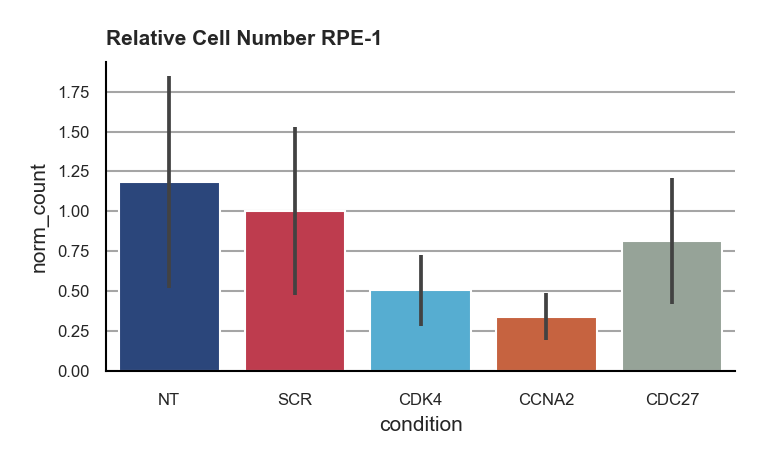

In [ ]:
# generate cell count figure
figures.rel_cellnumber(df_counts, conditions, 'RPE-1', path=figures_path)

## Cell Cycle Analysis
- Normalisation of the single cell data and gating of the cell cycle phases is done using cellcycle_analysis function
- Plotting scatterplots and histograms of the cell cycle phases is done using cellcycleplot function

In [ ]:
# cell cycle normalisation (best done for each experiment separately)
df_norm1 = normalisation.cellcycle_analysis(df1)
df_norm2 = normalisation.cellcycle_analysis(df2)
df_norm3 = normalisation.cellcycle_analysis(df3)
df_norm = pd.concat([df_norm1, df_norm2, df_norm3])

In [ ]:
# generate cell cycle figure
#number of bins can be adjusted depending on sample size
figures.cellcycleplot_comb(df_norm, conditions, 'RPE-1', bins=200, path=figures_path)

Saving figure Combined Cell Cycle Plot RPE-1


Saving figure CellCycle Scatter Plot RPE-1
Saving figure CellCycle Histogram_RPE-1


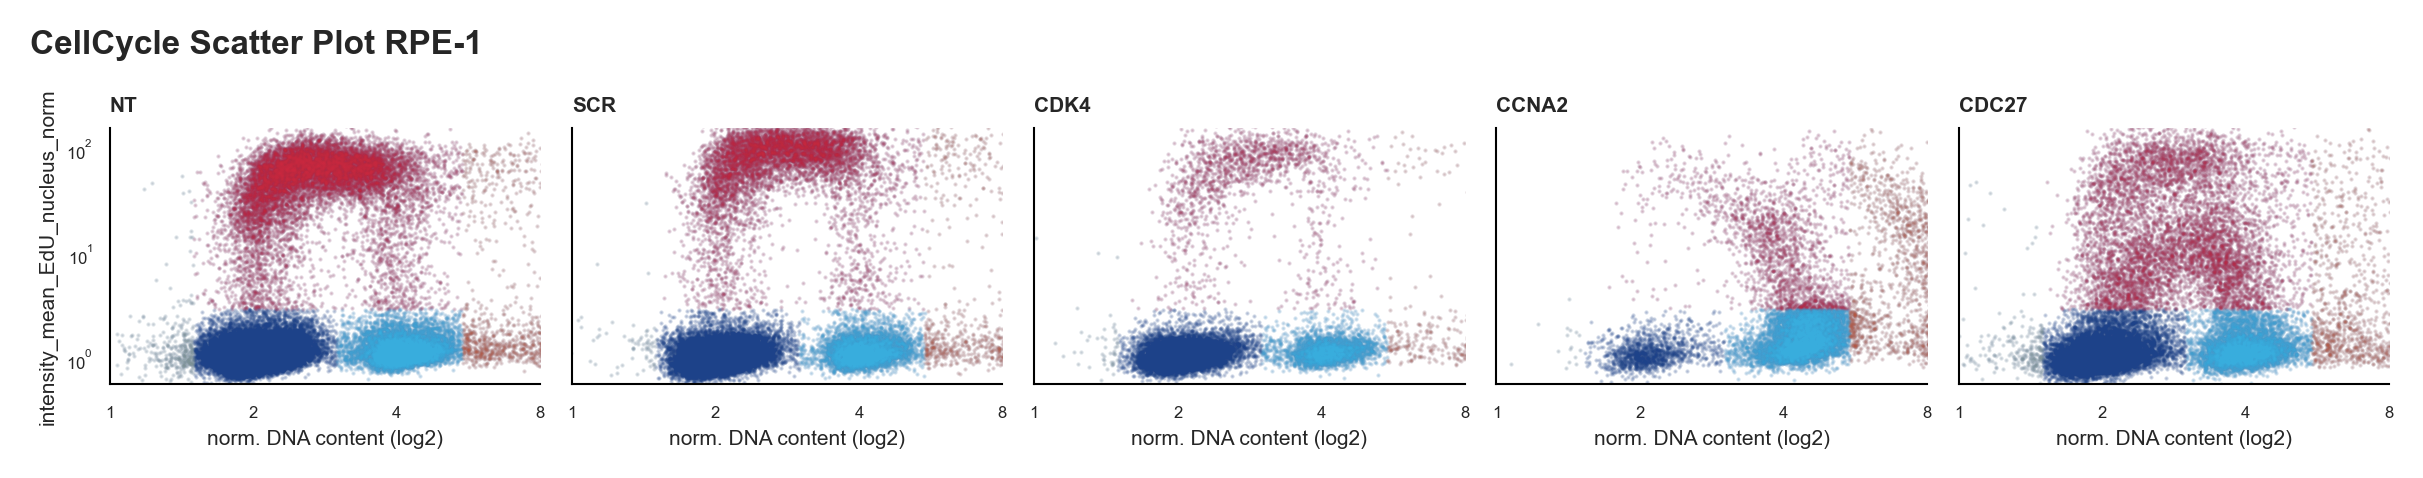

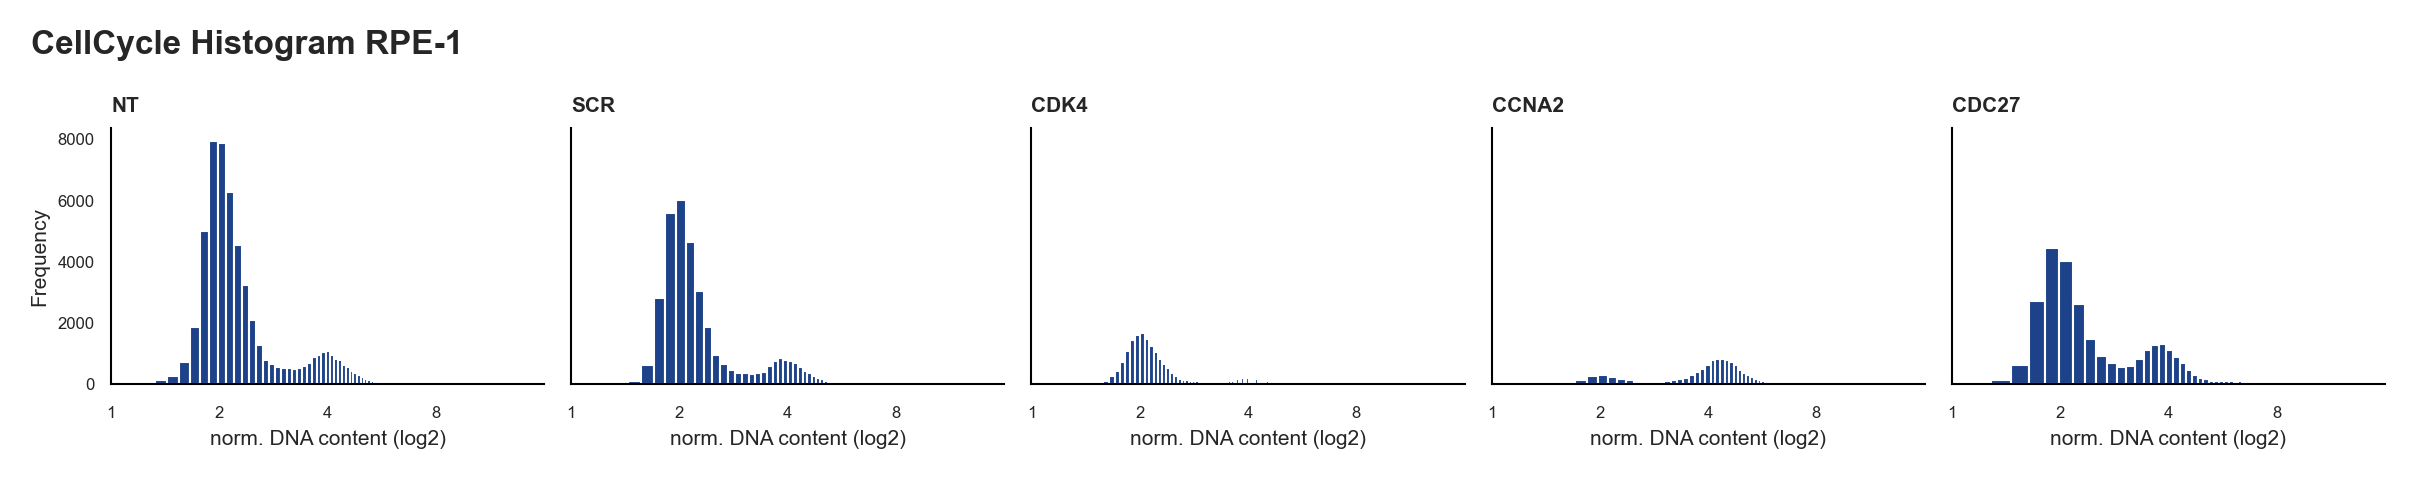

In [ ]:
# If preferred scatterplots and histograms can be generated separately

figures.cellcycle_scatterplot(df_norm, conditions, 'RPE-1', path=figures_path)
figures.cellcycle_histplot(df_norm, conditions, 'RPE-1', bins=300, path=figures_path) # number of bins can be adjusted depending on sample size

In [ ]:
# calculate proportion of cells in each phase per condition
df_prop = normalisation.cellcycle_prop(df_norm)
figures.cellcycle_barplot(df_prop, conditions, path=figures_path)